In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [34]:
x = pd.DataFrame(data.iloc[:, 1:2])
y = pd.DataFrame(data.iloc[:, 0:1])

<AxesSubplot:xlabel='YearsExperience', ylabel='Count'>

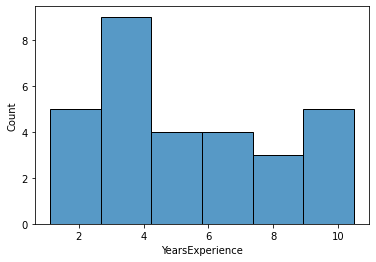

In [5]:
sns.histplot(data['YearsExperience'])
# more employees have experience around 3-4 years

<AxesSubplot:xlabel='Salary', ylabel='Count'>

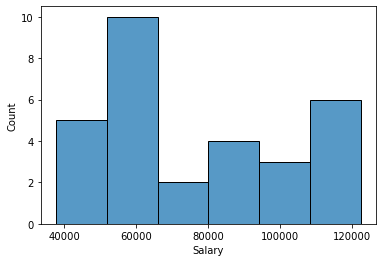

In [6]:
sns.histplot(data['Salary'])
# maximum employees have salary around 60000

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Salary'>

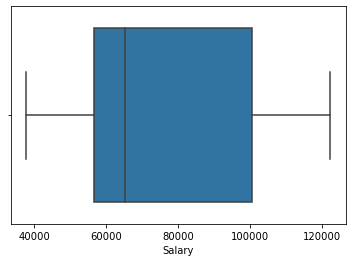

In [7]:
sns.boxplot(data['Salary'])
# The salary data is right-skewed. No presence of outliers.

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience'>

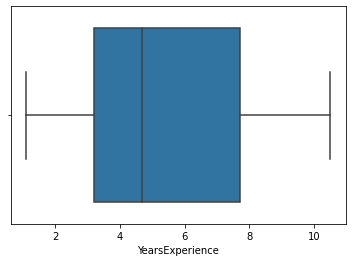

In [8]:
sns.boxplot(data['YearsExperience'])
#It is close to be normally distributed. No presence of outliers.

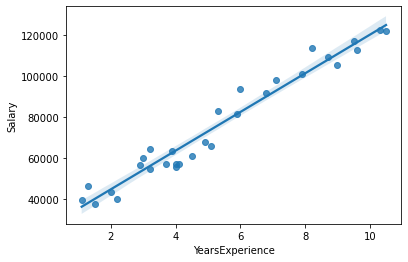

In [9]:
sns.regplot(x="YearsExperience", y="Salary", data=data);
#they have a positive correlation and the are +ve linearly associated
#equation is y = B0 + B1x where y is salary and x is yearsexperience

In [10]:
model = smf.ols('Salary~YearsExperience', data = data).fit()

In [11]:
model.params
#B0 = 25792.20    B1=9449.96

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [12]:
model.summary()
#R-squared:	0.957

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.14e-20
Time:                        16:44:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
sal_pred = model.predict(y)
sal_lst = x.Salary.values.tolist()
sal_pred_lst = sal_pred.tolist()
datap = [sal_lst, sal_pred_lst]
res = pd.DataFrame({'Actuals':datap[0], 'Predicted':datap[1]})

<AxesSubplot:>

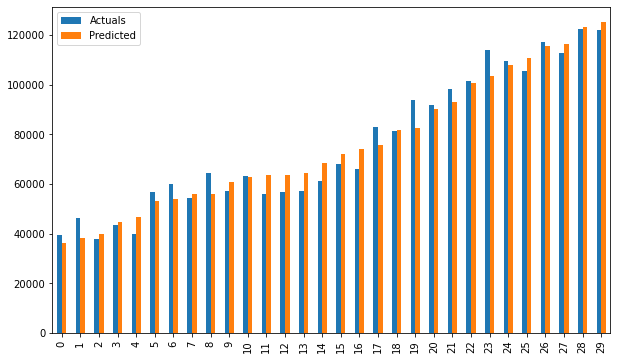

In [68]:
res.plot(kind='bar',figsize=(10,6))

In [30]:
import numpy as np
data['log_exp'] = np.log(data['YearsExperience'])
data['sq_exp'] = np.square(data['YearsExperience'])
data['sqrt_exp'] = np.sqrt(data['YearsExperience'])
ylog = pd.DataFrame(data.iloc[:, 2:3])
ysq= pd.DataFrame(data.iloc[:, 3:4])
ysqrt = pd.DataFrame(data.iloc[:, 4:5])
data.head()

,YearsExperience,Salary,log_exp,sq_exp,sqrt_exp
0,1.1,39343.0,0.095310,1.21,1.048809
1,1.3,46205.0,0.262364,1.69,1.140175
2,1.5,37731.0,0.405465,2.25,1.224745
3,2.0,43525.0,0.693147,4.00,1.414214
4,2.2,39891.0,0.788457,4.84,1.483240


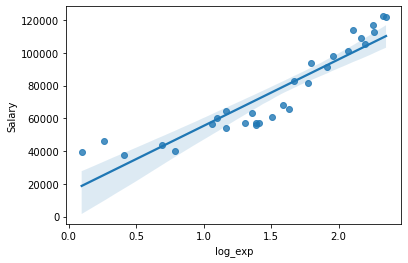

In [15]:
sns.regplot(x="log_exp", y="Salary", data=data);

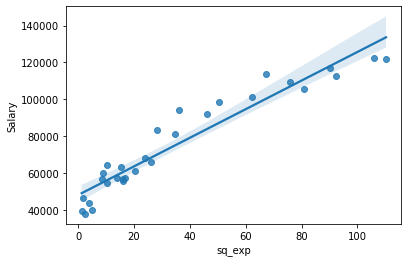

In [16]:
sns.regplot(x="sq_exp", y="Salary", data=data);

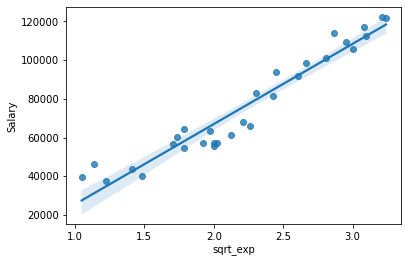

In [17]:
sns.regplot(x="sqrt_exp", y="Salary", data=data);

In [21]:
model_log = smf.ols('Salary~log_exp', data = data).fit()
model_log.summary()
#R-squared:	0.854

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           3.25e-13
Time:                        16:48:13   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
log_exp     4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

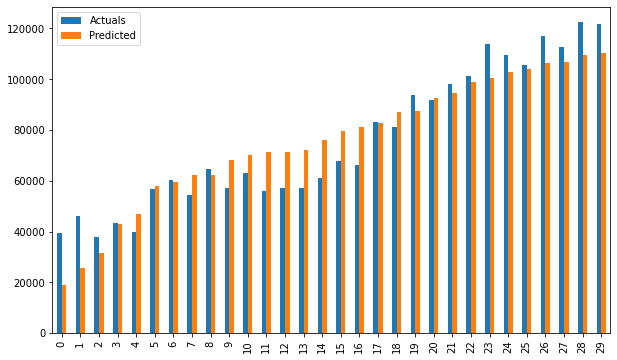

In [24]:
sal_predlog = model_log.predict(ylog)
sal_lst = x.Salary.values.tolist()
sal_predlog_lst = sal_predlog.tolist()
dataplog = [sal_lst, sal_predlog_lst]
res = pd.DataFrame({'Actuals':dataplog[0], 'Predicted':dataplog[1]})
res.plot(kind='bar',figsize=(10,6))

In [26]:
model_sq = smf.ols('Salary~sq_exp', data = data).fit()
model_sq.summary()
#R-squared:	0.915

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     302.7
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           1.52e-16
Time:                        16:53:36   Log-Likelihood:                -311.59
No. Observations:                  30   AIC:                             627.2
Df Residuals:                      28   BIC:                             630.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.804e+04   2186.372     21.974      0.000    4.36e+04    5.25e+04
sq_exp       776.3188     44.624     17.397      0.000     684.911     867.726
==============================================================================
Omnibus:                        1.294   Durbin-Watson:                   0.883
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                1.240
Skew:                           0.409   Prob(JB):                        0.538
Kurtosis:                       2.432   Cond. No.                         72.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

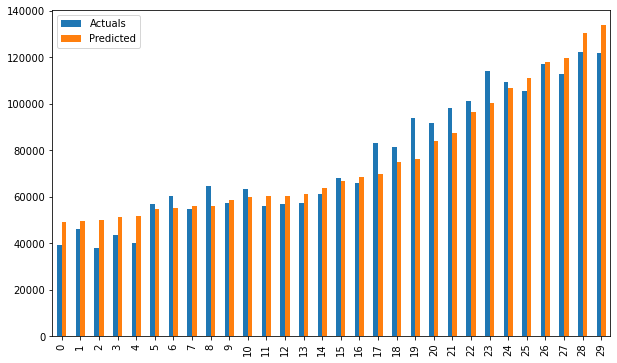

In [31]:
sal_predsq = model_sq.predict(ysq)
sal_predsq_lst = sal_predsq.tolist()
datapsq = [sal_lst, sal_predsq_lst]
res = pd.DataFrame({'Actuals':datapsq[0], 'Predicted':datapsq[1]})
res.plot(kind='bar',figsize=(10,6))

In [32]:
model_sqrt = smf.ols('Salary~sqrt_exp', data = data).fit()
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     377.8
Date:                Sun, 24 Apr 2022   Prob (F-statistic):           8.57e-18
Time:                        16:56:59   Log-Likelihood:                -308.52
No. Observations:                  30   AIC:                             621.0
Df Residuals:                      28   BIC:                             623.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.606e+04   4921.599     -3.262      0.003   -2.61e+04   -5974.331
sqrt_exp     4.15e+04   2135.122     19.437      0.000    3.71e+04    4.59e+04
==============================================================================
Omnibus:                        0.588   Durbin-Watson:                   1.031
Prob(Omnibus):                  0.745   Jarque-Bera (JB):                0.638
Skew:                           0.011   Prob(JB):                        0.727
Kurtosis:                       2.286   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

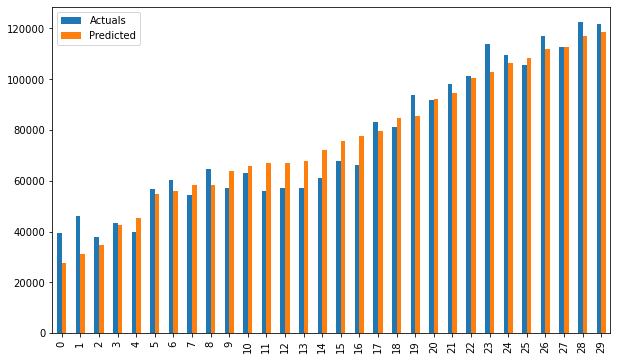

In [33]:
sal_predsqrt = model_sqrt.predict(ysqrt)
sal_predsqrt_lst = sal_predsqrt.tolist()
datapsqrt = [sal_lst, sal_predsqrt_lst]
res = pd.DataFrame({'Actuals':datapsqrt[0], 'Predicted':datapsqrt[1]})
res.plot(kind='bar',figsize=(10,6))